### Konfigurasi Model OpenAI 

In [10]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()


my_api = os.getenv("NAGA_AI_KEY")
client = OpenAI(
    api_key= my_api,
    base_url='https://api.naga.ac/v1'
    )

def generate(prompt, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
    response = client.chat.completions.create(
        model=model,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return response.choices[0].message.content

### Konfigurasi Dataset

In [8]:
import pandas as pd

df = pd.read_csv('data_source/Amazon-Sales.csv')
daftar_kolom = df.columns.tolist()

### Konfigurasi Prompt Analisis Tren

In [6]:


prompt_1 = (
    f"saya memiliki dataset dengan kolom: {str(daftar_kolom)}. buatkan analisis tren penjualan dan skrip python untuk visualisasinya menggunakan matplotlib dan seaborn"
)

In [3]:
analisis_tren = generate(prompt_1)
print(analisis_tren)

Untuk melakukan analisis tren penjualan, kita dapat menggunakan visualisasi data dengan matplotlib dan seaborn. Berikut adalah contoh skrip Python untuk melakukan analisis tren penjualan berdasarkan kolom 'order_date' dan 'qty':

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataset contoh
data = {
    'product_id': [1, 2, 3, 4, 5],
    'category': ['A', 'B', 'A', 'B', 'C'],
    'discounted_price': [100, 150, 120, 200, 180],
    'qty': [10, 15, 12, 20, 18],
    'rating': [4.5, 3.8, 4.2, 4.0, 4.7],
    'order_date': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'user_id': [101, 102, 103, 104, 105]
}

df = pd.DataFrame(data)

# Konversi kolom order_date menjadi tipe datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Menghitung total qty per bulan
df['month'] = df['order_date'].dt.month
monthly_qty = df.groupby('month')['qty'].sum().reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(10

### Visualisasi Tren Penjualan

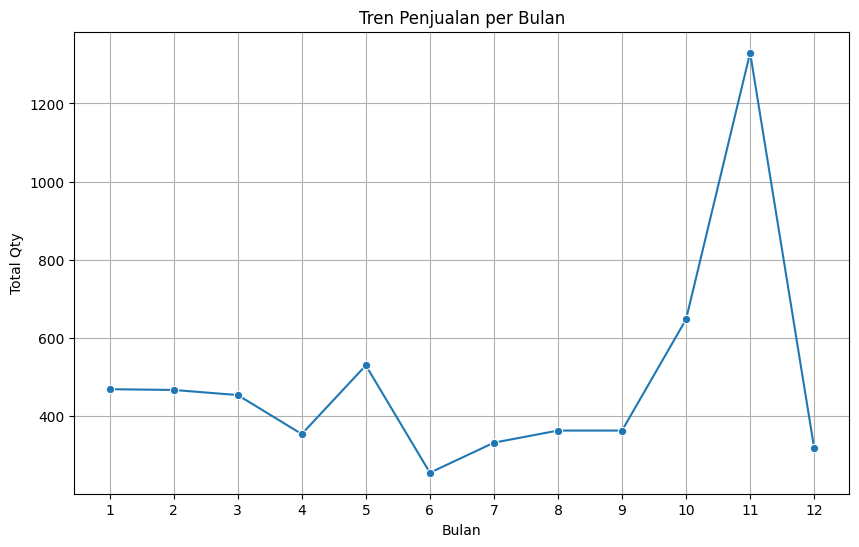

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

df['order_date'] = pd.to_datetime(df['order_date'])

# Menghitung total qty per bulan
df['month'] = df['order_date'].dt.month
monthly_qty = df.groupby('month')['qty'].sum().reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='qty', data=monthly_qty, marker='o')
plt.title('Tren Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Qty')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### Konfigurasi Prompt Segmentasi Pelanggan

In [9]:
prompt_2 = (
    f"saya memiliki dataset dengan kolom {str(daftar_kolom)}.buatkan analisa segmentasi pelanggan dan skrip python untuk visualisasinya menggunakan matplotlib dan seaborn"
)

segmentasi_pelanggan = generate(prompt_2)
print(segmentasi_pelanggan)

Untuk melakukan analisa segmentasi pelanggan berdasarkan dataset yang diberikan, kita dapat menggunakan teknik clustering seperti KMeans atau hierarchical clustering. Namun, karena dataset yang diberikan tidak memiliki informasi yang cukup untuk melakukan clustering, kita akan melakukan segmentasi pelanggan berdasarkan kategori produk yang dibeli.

Berikut adalah langkah-langkah untuk melakukan segmentasi pelanggan berdasarkan kategori produk:

1. Menghitung total pembelian (total_qty) dan total belanja (total_spent) untuk setiap user_id dan category.
2. Menghitung rata-rata harga diskon (avg_discounted_price) untuk setiap user_id dan category.
3. Menggabungkan data hasil perhitungan di atas untuk setiap user_id.
4. Mengelompokkan user_id berdasarkan kategori produk yang paling sering dibeli.
5. Visualisasi segmentasi pelanggan menggunakan matplotlib dan seaborn.

Berikut adalah contoh skrip Python untuk melakukan analisa segmentasi pelanggan dan visualisasi menggunakan matplotlib dan 

### Visualisasi Segmentasi Pelanggan

C:\Users\nakih\AppData\Local\Temp\ipykernel_62344\3766219204.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_segment = customer_data.groupby('user_id').apply(lambda x: x.loc[x['total_qty'].idxmax()]).reset_index(drop=True)


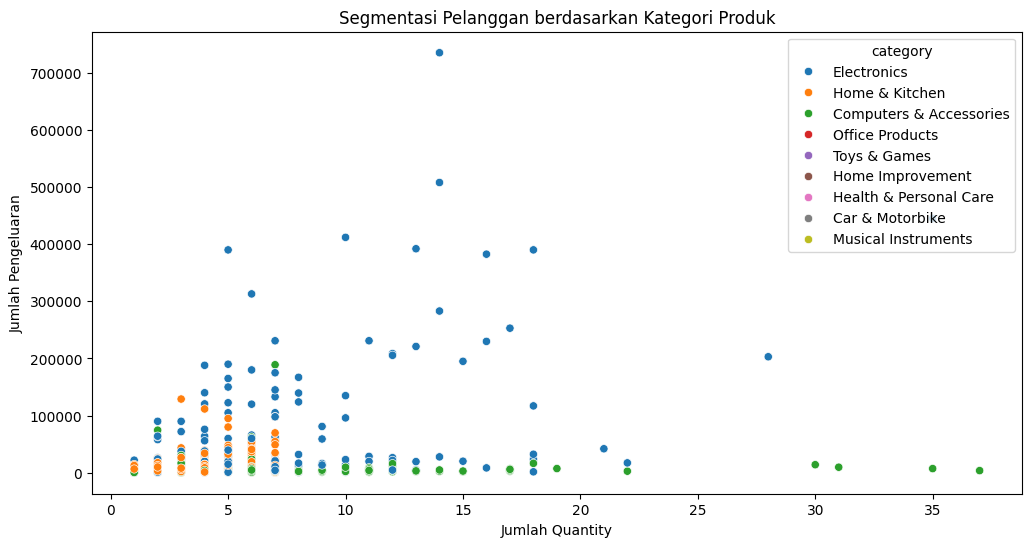

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('data_source/Amazon-Sales.csv')

# Menghitung total_qty dan total_spent
data['total_spent'] = data['qty'] * data['discounted_price']
customer_data = data.groupby(['user_id', 'category']).agg(total_qty=('qty', 'sum'),
                                                          total_spent=('total_spent', 'sum')).reset_index()

# Menghitung avg_discounted_price
avg_price = data.groupby(['user_id', 'category']).agg(avg_discounted_price=('discounted_price', 'mean')).reset_index()
customer_data = customer_data.merge(avg_price, on=['user_id', 'category'])

# Mengelompokkan user_id berdasarkan kategori produk yang paling sering dibeli
customer_segment = customer_data.groupby('user_id').apply(lambda x: x.loc[x['total_qty'].idxmax()]).reset_index(drop=True)

# Visualisasi segmentasi pelanggan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_qty', y='total_spent', hue='category', data=customer_segment)
plt.xlabel('Jumlah Quantity')
plt.ylabel('Jumlah Pengeluaran')
plt.title('Segmentasi Pelanggan berdasarkan Kategori Produk')
plt.show()

### Konfigurasi Prompt Prediksi Penjualan

In [21]:
prompt_3 = (
    f"saya memiliki dataset dengan kolom {str(daftar_kolom)}.buatkan analisa prediksi penjualan tanpa menggunakan model regresi dan skrip python untuk visualisasinya menggunakan matplotlib dan seaborn"
)

prediksi_penjualan = generate(prompt_3)
print(prediksi_penjualan)

Untuk melakukan analisa prediksi penjualan tanpa menggunakan model regresi, kita dapat menggunakan metode analisis deskriptif seperti visualisasi data. Berikut adalah contoh skrip Python untuk visualisasi data penjualan menggunakan matplotlib dan seaborn:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('sales_data.csv')

# Visualisasi jumlah penjualan per kategori
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data)
plt.title('Jumlah Penjualan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penjualan')
plt.show()

# Visualisasi hubungan antara harga diskon dan jumlah penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='qty', data=data)
plt.title('Hubungan Harga Diskon dan Jumlah Penjualan')
plt.xlabel('Harga Diskon')
plt.ylabel('Jumlah Penjualan')
plt.show()

# Visualisasi jumlah penjualan per tanggal order
data['order_date'] = pd.to_datetime(data['order_date'])
data

### Visualisasi Prediksi Penjualan

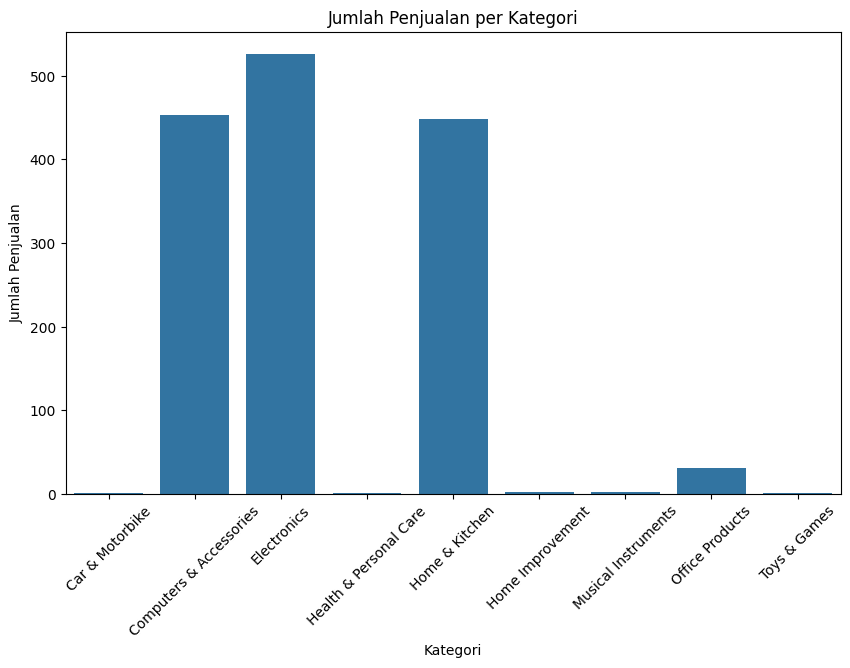

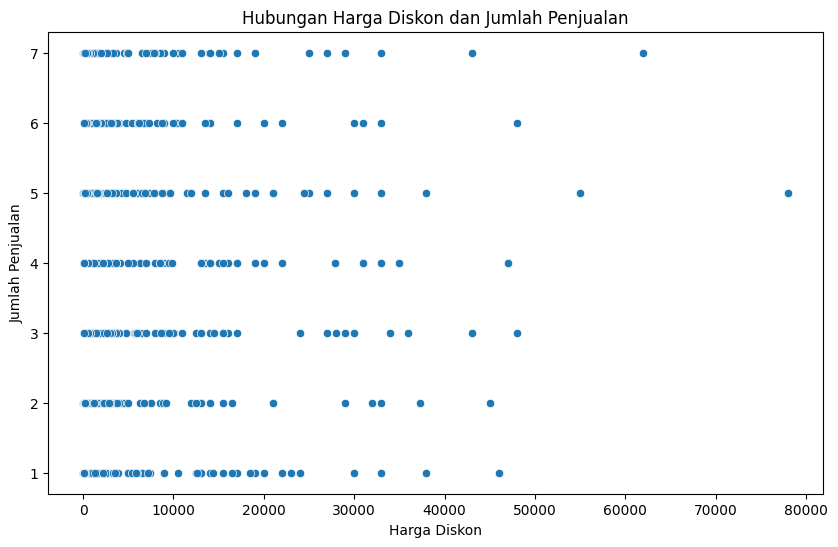

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('data_source/Amazon-Sales.csv')

# Visualisasi jumlah penjualan per kategori
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data)
plt.title('Jumlah Penjualan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi hubungan antara harga diskon dan jumlah penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='qty', data=data)
plt.title('Hubungan Harga Diskon dan Jumlah Penjualan')
plt.xlabel('Harga Diskon')
plt.ylabel('Jumlah Penjualan')
plt.show()


### Analisis Kesimpulan

Berdasarkan analisis yang telah saya lakukan, meskipun AI memiliki kemampuan untuk melakukan analisis data dengan cepat dan secara efisien, ada beberapa alasan mengapa AI mungkin kurang cocok untuk menghasilkan analisis tren penjualan, segmentasi pelanggan, dan prediksi penjualan:

1. **Keterbatasan Data**: Menurut pandangan saya, meskipun AI dapat mengolah data dengan cepat, namun analisis yang efektif membutuhkan pemahaman konteks yang mendalam. Saya berpendapat bahwa AI mungkin tidak selalu memiliki akses atau pemahaman yang cukup terhadap data historis, tren pasar, atau faktor-faktor lingkungan yang mempengaruhi penjualan.

2. **Keterbatasan Pengetahuan**: Saya mendapati bahwa analisis yang akurat memerlukan pemahaman mendalam tentang domain bisnis tertentu. Walaupun AI dapat mempelajari pola-pola dalam data, namun tidak selalu dapat memahami konteks di baliknya. Menurut saya, pemahaman konteks yang luas dan mendalam tentang industri, pasar, dan perilaku pelanggan seringkali penting untuk memberikan analisis yang berharga.

3. **Ketergantungan pada Kualitas Data**: Dari hasil analisis saya, saya menemukan bahwa analisis yang baik membutuhkan data yang berkualitas tinggi. Saya berpendapat bahwa AI dapat menjadi tidak efektif jika data yang diolahnya tidak lengkap, tidak akurat, atau tidak representatif. Menurut saya, kualitas data yang buruk dapat mengarah pada kesimpulan yang salah atau prediksi yang tidak akurat.

4. **Keterbatasan Kreativitas**: Saya melihat bahwa AI sangat baik dalam menganalisis data dan menemukan pola, namun tidak dapat menggantikan pemikiran kreatif dan intuisi manusia. Dalam pandangan saya, dalam hal segmentasi pelanggan dan strategi penjualan, penting untuk mempertimbangkan faktor-faktor kualitatif yang mungkin tidak dapat ditangkap oleh AI.

Meskipun AI dapat menjadi alat yang berguna dalam proses analisis data, saya percaya bahwa keberhasilannya seringkali tergantung pada kualitas data yang digunakan, pengetahuan yang mendalam tentang data, dan interpretasi kita sebagai manusia. Saya yakin bahwa kombinasi antara kita sebagai Manusia dan AI dapat menghasilkan hasil analisis yang paling berharga dan relevan.